In [96]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


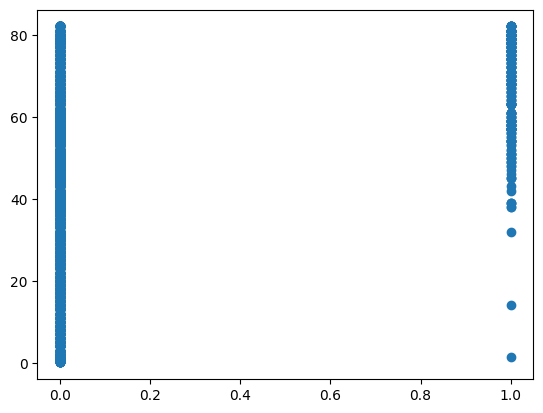

In [42]:
plt.plot(df['stroke'], df['age'], 'o')
plt.show()

<Figure size 1000x600 with 0 Axes>

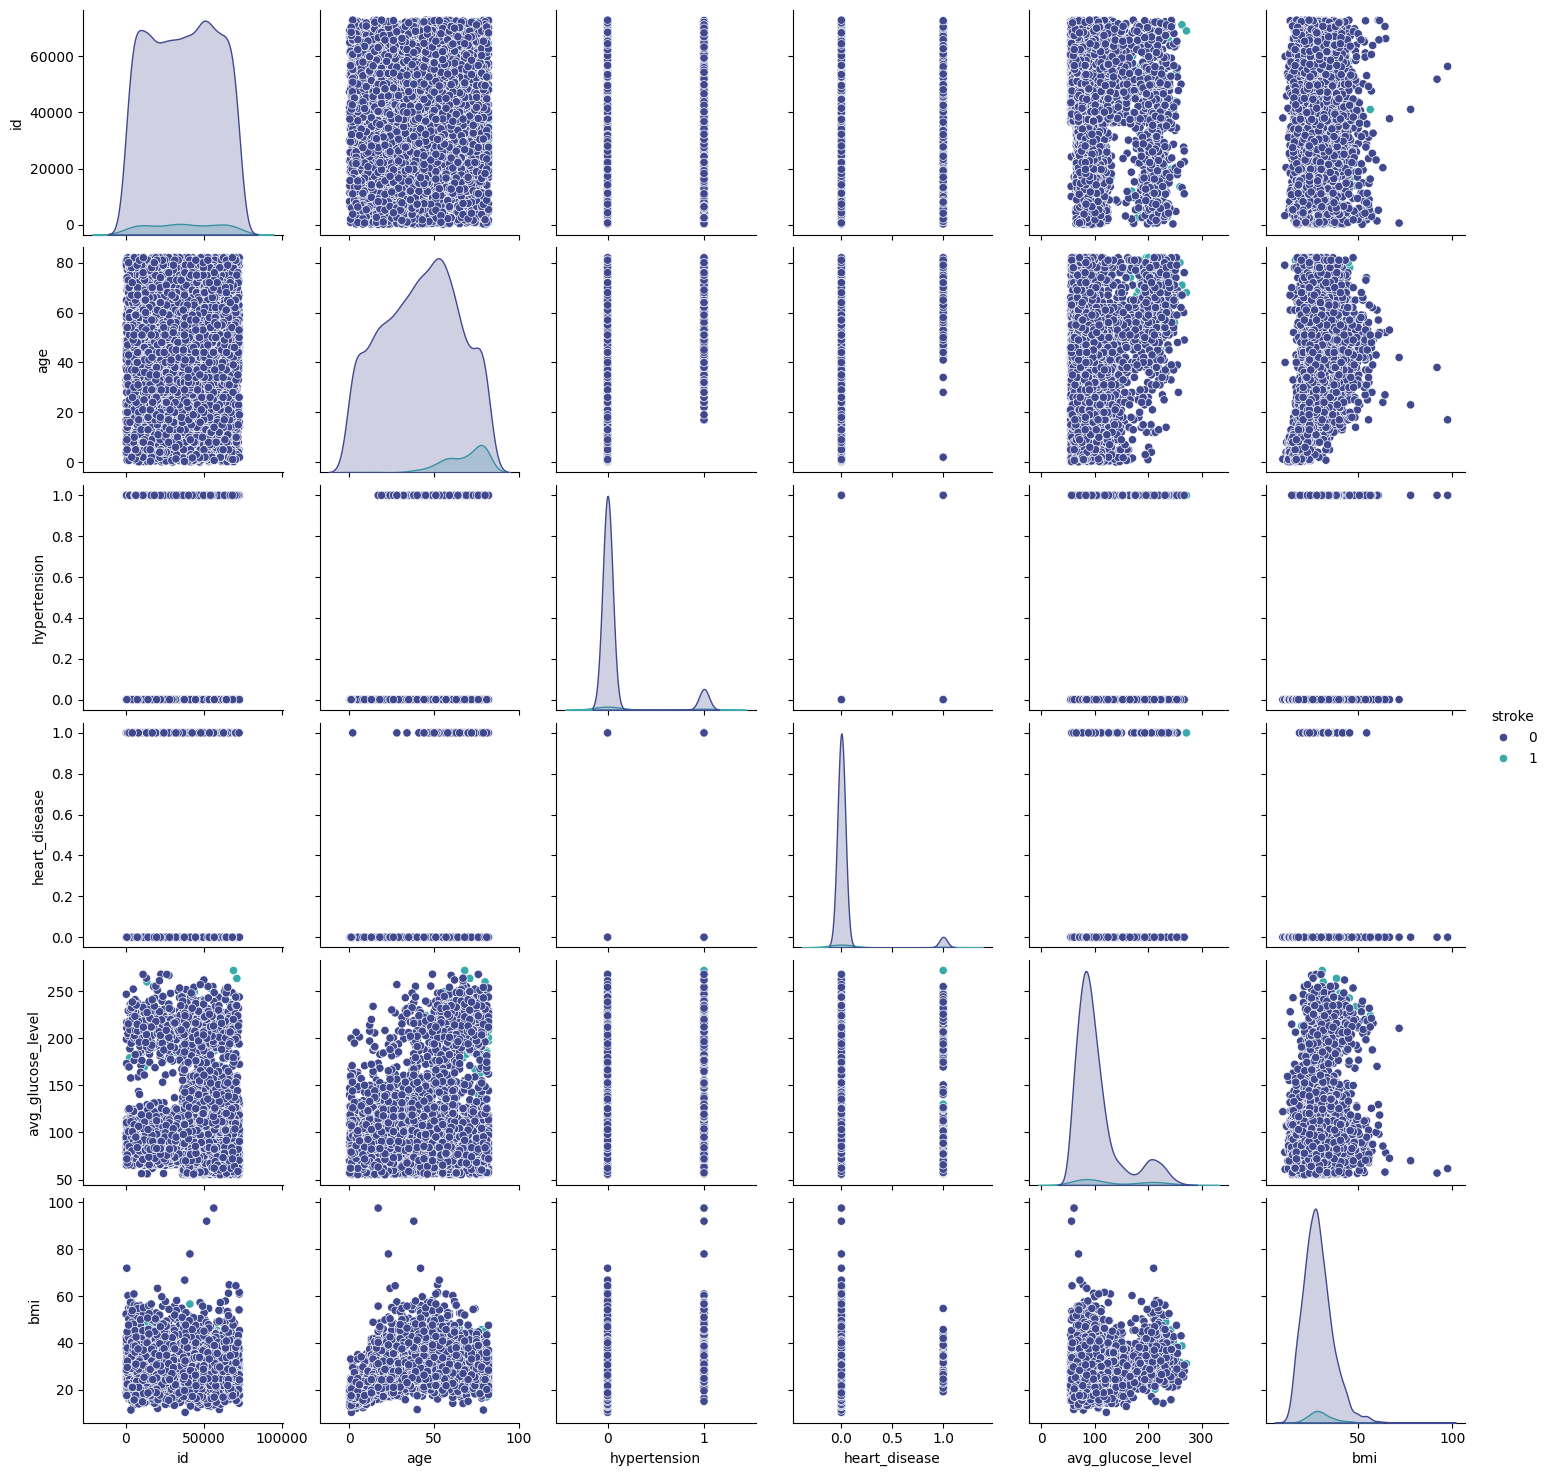

In [21]:
#All grafics using seaborn

plt.figure(figsize=(10,6))
sns.pairplot(df, hue='stroke', palette='mako')

In [23]:
df.duplicated().any()

False

In [24]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [70]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [71]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

([<matplotlib.patches.Wedge at 0x13b21ef8e90>,
 [Text(-1.0488454518125865, 0.3315467059285184, 'No Hypertension'),
  Text(1.0488454440521755, -0.3315467304785183, 'Hypertension')],
 [Text(-0.5720975191705017, 0.18084365777919187, '90.3%'),
  Text(0.5720975149375501, -0.1808436711701009, '9.7%')])

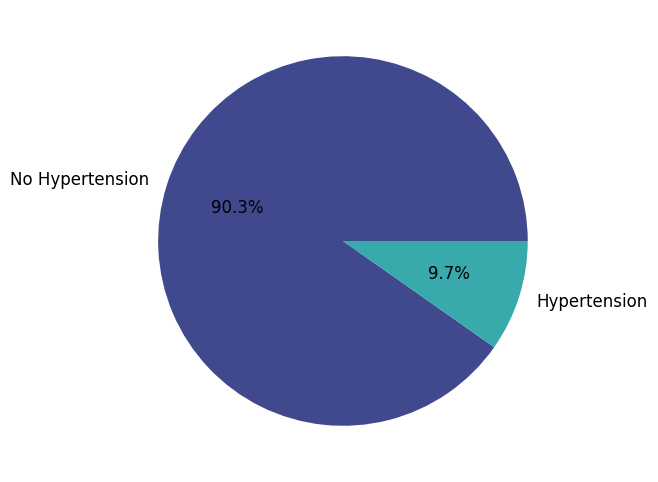

In [27]:
plt.figure(figsize=(10,6))
plt.pie(df['hypertension'].value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),textprops={'fontsize':12})

In [28]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

([<matplotlib.patches.Wedge at 0x13b304b4610>,
 [Text(-1.0871311194161455, 0.16776748551789922, 'No stroke'),
  Text(1.0871311174527047, -0.16776749824096934, 'Had stroke')],
 [Text(-0.5929806105906248, 0.09150953755521775, '95.1%'),
  Text(0.5929806095196571, -0.09150954449507419, '4.9%')])

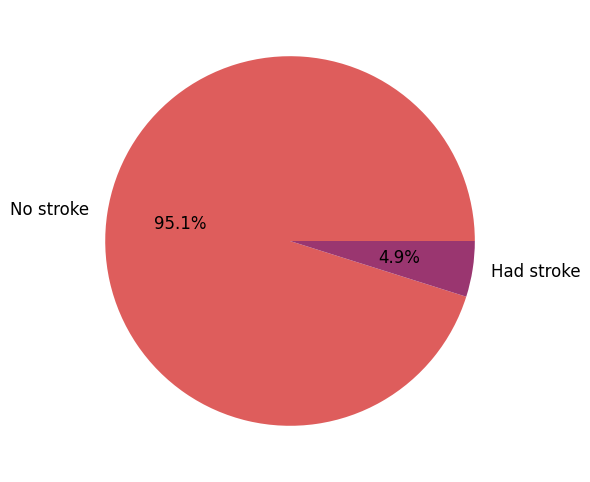

In [61]:
plt.figure(figsize=(10,6))
plt.pie(df['stroke'].value_counts(),labels=['No stroke','Had stroke'],autopct='%1.1f%%',
        colors=sns.color_palette('flare',2),textprops={'fontsize':12})

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

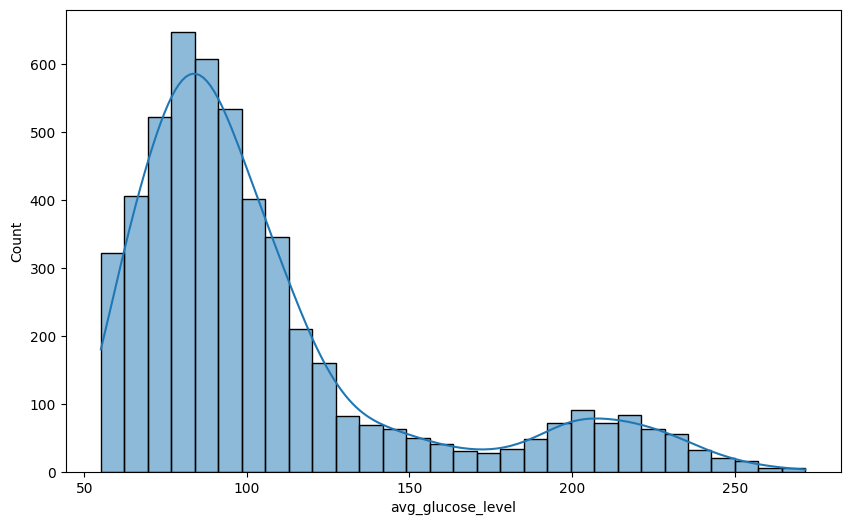

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['avg_glucose_level'], kde=True,bins=30)

<Axes: xlabel='bmi', ylabel='Count'>

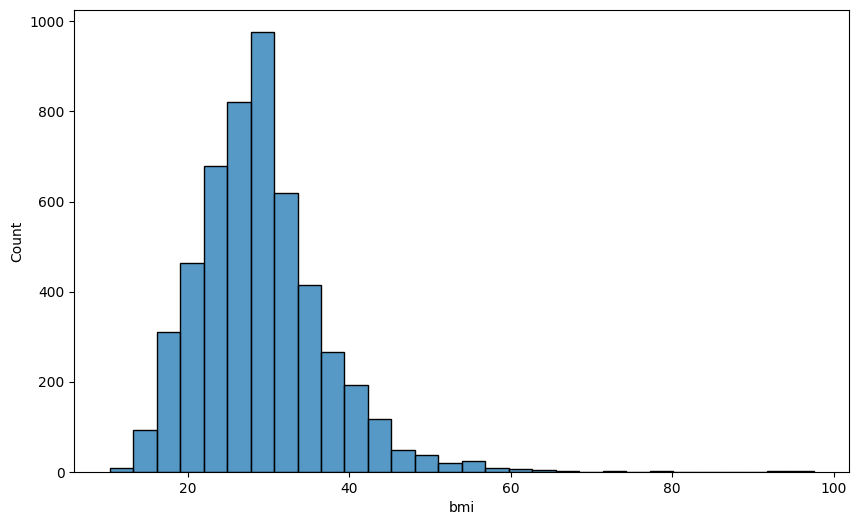

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df['bmi'],kde=False,bins=30)

In [72]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [73]:
df.drop(df[df['gender'] == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [74]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

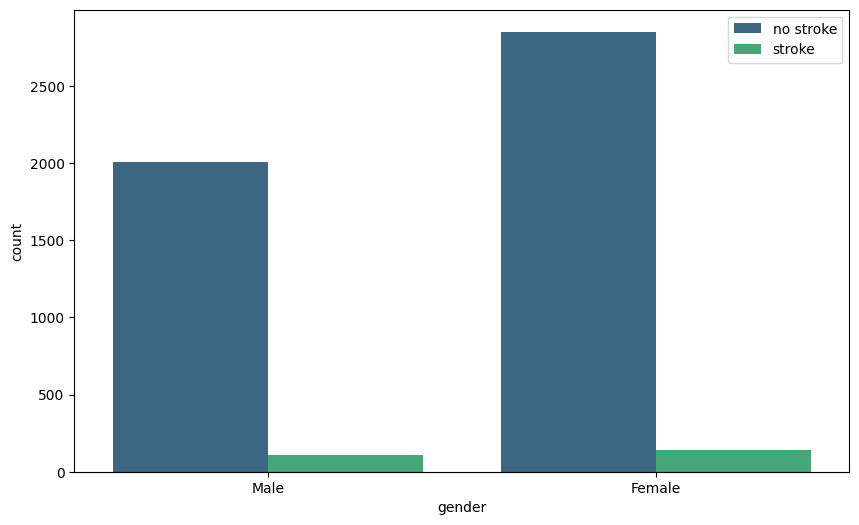

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=df, palette='viridis', hue='stroke')
plt.legend(['no stroke', 'stroke'])

In [77]:
df['gender'] = df['gender'].map({'Male':0,'Female':1})

In [75]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

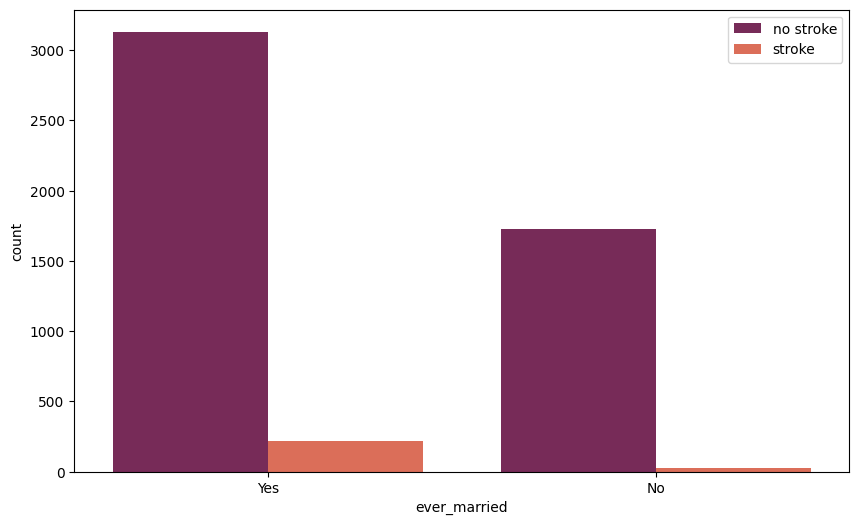

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x='ever_married', data=df, palette='rocket',hue='stroke')
plt.legend(['no stroke','stroke'])

In [78]:
df['ever_married'] = df['ever_married'].map({'No':0,'Yes':1})

In [79]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

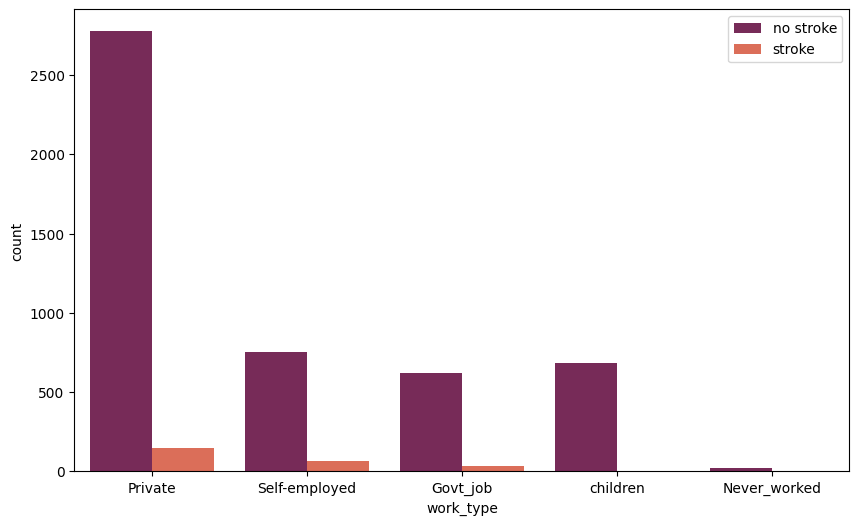

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type', data=df, palette='rocket', hue='stroke')
plt.legend(['no stroke','stroke'])

<Axes: xlabel='work_type', ylabel='count'>

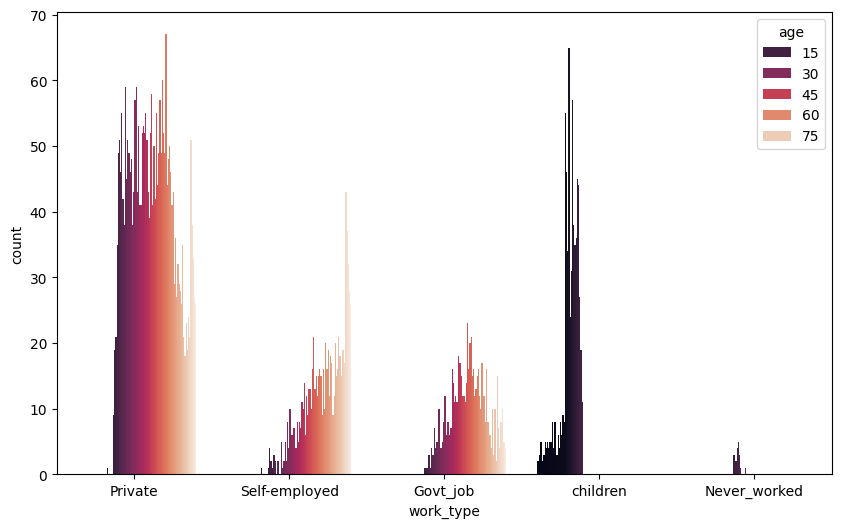

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type', data=df, palette='rocket', hue='age')

In [82]:
df['work_type'] = df['work_type'].map({'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4})

In [83]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

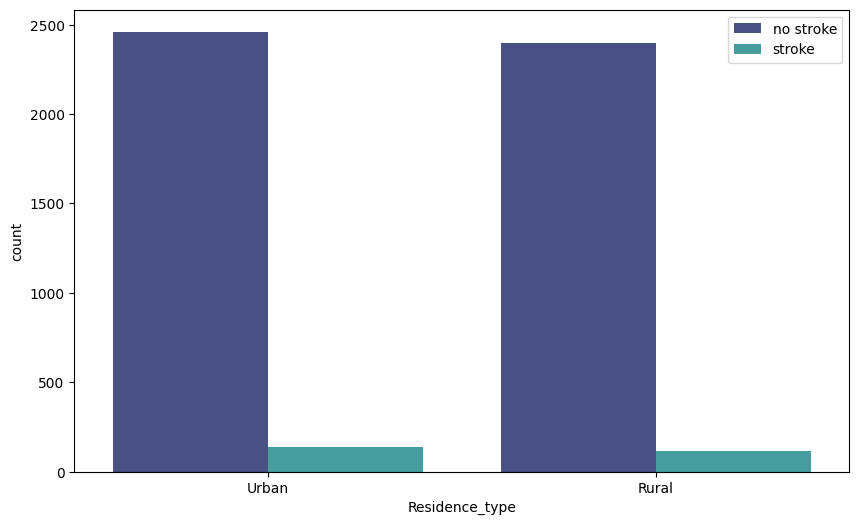

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [85]:
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural' : 0})

In [86]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

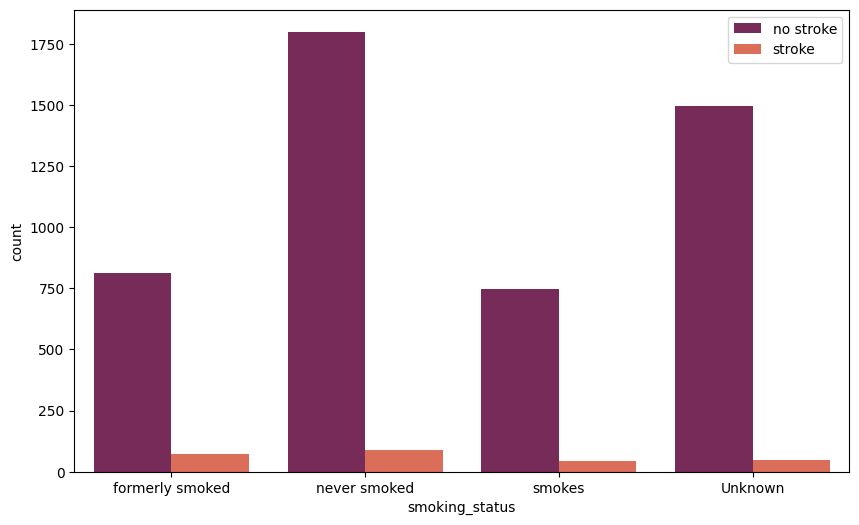

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df, palette='rocket',hue='stroke')
plt.legend(['no stroke','stroke'])

In [88]:
df['smoking_status'] = df['smoking_status'].map({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':3})

In [90]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,51676,1,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.000000,0,1


<Axes: >

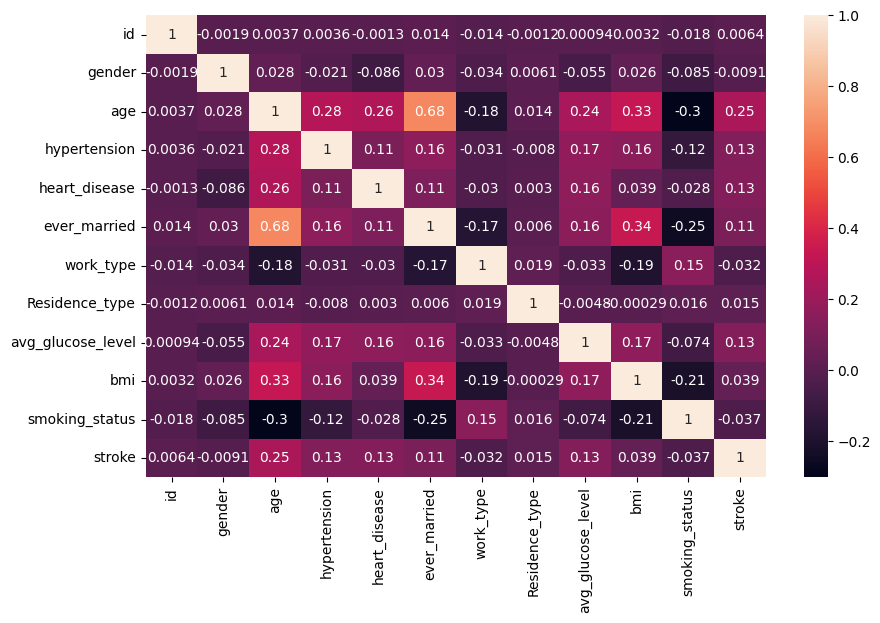

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True) #checking the correlations between features